In [0]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Polynomial models
In this exercise you will implement a method to estimate the model parameters of single variate (single input) 2-nd and 3-rd order polynomials and use these models to predict a label for new datapoints. Next week you will extend this method to $n$-th order, single variate, polynomials in a fairly straightforward manner. 

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#prep">Task 1: Finishing in-class</a>
            </li>
            <li>
            <a href="#loading7">Task 2: Data preparation (data wrangling)</a>
            </li>
            <li>
            <a href="#loading8">Task 3: Constructing the design matrix</a>
            </li>
            <li>
            <a href="#loading9">Task 4: Inverting the design matrix</a>
            </li>
            <li>
            <a href="#loading10">Task 5: Plotting</a>
            </li>
            <li>
            <a href="#loading10130">Task 6: Making predictions</a>
            </li>
            <li>
            <a href="#loading11">Task 7: Third order polynomials</a>
            </li>
            <li>
            <a href="#loading13">Task 8: Plotting</a>
            </li>
            <li>
            <a href="#loading100">Task 9: Making predictions</a>
            </li>
        </ul>
    </div>
</article>

<article class="message task"><a class="anchor" id="prep"></a>
    <div class="message-header">
        <span>Task 1: Finishing in-class</span>
        <span class="has-text-right">
          <i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Ensure that you have finished all of the tasks from the W3 in-class exercise
, as you will need them for the following tasks. 



</div></article>

## 2nd-order Polynomial model
A 2nd-order polynomial model, also known as a quadratic model, can be expressed as:

$$ y = w_0 + w_1 x + w_2 x^2 $$
This model assumes that the relationship between the input $x$ and the label $y$ is non-linear and quadratic. This way a curved relationship can be modelled which can capture patterns that a simple linear model might miss. 
By fitting this model, the aim is to find the parameters $w_0$, $w_1$, and $w_2$ that minimize the difference between the predicted values and the actual data, providing a more flexible fit compared to a linear model.
Run the cell below to load libraries and construct the datasets:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

quadratic_dataset_1 = np.array([[1, 2],
                                [2, 3],
                                [3, 6]])

quadratic_dataset_2 = np.array([[9, 3],
                                [7, 5],
                                [1, 9]])

quadratic_dataset_3 = np.array([[8, 4],
                                [10, 5],
                                [3, 1]])

Throughout the next tasks, the aim is to construct the design matrix using the known variables, followed by learning the model parameters (solving) using the inverse of the design matrix. The subsequent tasks involve using the learnt model parameters to predict new unseen inputs and plotting the results.
<article class="message task"><a class="anchor" id="loading7"></a>
    <div class="message-header">
        <span>Task 2: Data preparation (data wrangling)</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. For each dataset identify which values correspond to inputs and which are the labels.
2. Complete the `separate_inputs_labels`
 function below. The function takes a dataset as input and returns the inputs as the `X_quadratic`
 matrix and the labels as the `y_quadratic`
 vector.



</div></article>



In [74]:
def separate_inputs_labels(dataset):
    """
    This function takes a dataset as input and returns the inputs and labels.

    Parameters:
    dataset (numpy array): The dataset to be separated.

    Returns:
    X_quadratic (3x1 numpy array): The input matrix.
    y_quadratic (1x3 numpy array): The labels vector.
    """
    X_quadratic = (dataset[:,0]).reshape((len(dataset),1))
    y_quadratic = dataset[:,1]

    return X_quadratic, y_quadratic

# Applying the function to each quadratic dataset
X1_quadratic, y1_quadratic = separate_inputs_labels(quadratic_dataset_1)
X2_quadratic, y2_quadratic = separate_inputs_labels(quadratic_dataset_2)
X3_quadratic, y3_quadratic = separate_inputs_labels(quadratic_dataset_3)

print("X1_quadratic: \n", X1_quadratic)
print("y1_quadratic: \n", y1_quadratic)

X1_quadratic: 
 [[1]
 [2]
 [3]]
y1_quadratic: 
 [2 3 6]


<article class="message task"><a class="anchor" id="loading8"></a>
    <div class="message-header">
        <span>Task 3: Constructing the design matrix</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


Reuse the code from the in-class exercise:
1. Add the 2nd order polynomial term and construct the design matrix for each dataset.
2. Print the results.



</div></article>



In [33]:
def design_matrix(dataset):
    length = len(dataset)
    X = np.zeros((length,length))
    for i in range(length):
        for j in range(length):
            x = (int(dataset[i][0])**(length-1-j))
            X[i][j] = x

    return X

X1_quadratic_design = design_matrix(quadratic_dataset_1)
print("Design Matrix for Dataset 1:\n", X1_quadratic_design)

Design Matrix for Dataset 1:
 [[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]


<article class="message task"><a class="anchor" id="loading9"></a>
    <div class="message-header">
        <span>Task 4: Inverting the design matrix</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Compute the inverse of each design matrix.
2. Compute the model parameters (referenced as `weigths`
 in the cells below), then print the results.



</div></article>



In [39]:
inverse_1 = np.linalg.inv(X1_quadratic_design)
weights1_quadratic = np.dot(inverse_1, y1_quadratic)
print("Model parameters for Model 1:", weights1_quadratic)

X2_quadratic_design = design_matrix(quadratic_dataset_2)
inverse_2 = np.linalg.inv(X2_quadratic_design)
weights2_quadratic = np.dot(inverse_2, y2_quadratic)
print("Model parameters for Model 2:", weights2_quadratic)

X3_quadratic_design = design_matrix(quadratic_dataset_3)
inverse_3 = np.linalg.inv(X3_quadratic_design)
weights3_quadratic = np.dot(inverse_3, y3_quadratic)
print("Model parameters for Model 3:", weights3_quadratic)

Model parameters for Model 1: [ 1. -2.  3.]
Model parameters for Model 2: [-0.04166667 -0.33333333  9.375     ]
Model parameters for Model 3: [-0.01428571  0.75714286 -1.14285714]


<article class="message task"><a class="anchor" id="loading10"></a>
    <div class="message-header">
        <span>Task 5: Plotting</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the `plot_quadratic_model`
 function to plot the results.
2. Visually inspect the plots and discuss how the model parameters influence the shape and position of the fitted curve. 
3. Compare the results of the polynomial model to the outcome of the linear model implemented in the in-class exercise.



</div></article>



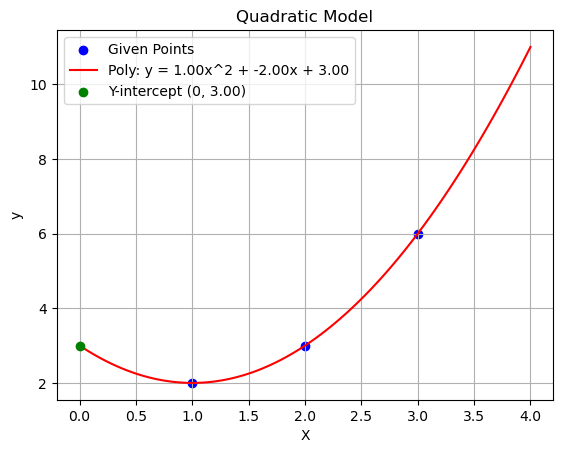

In [38]:
# Function to plot data points and fitted quadratic model
def plot_quadratic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]

    # Plot the fitted polynomial
    plt.plot(x_vals,
             y_vals,
             color='red',
             label=f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + {weights[2]:.2f}')

    # Plot the y-intercept
    plt.scatter(0, weights[2], color='green', zorder=5, label=f'Y-intercept (0, {weights[2]:.2f})')

    # Add title and labels
    plt.title('Quadratic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_quadratic_model(X1_quadratic, y1_quadratic, weights1_quadratic)

# the first model parameter (a) determines if the polymonial is smiling:).
# If a is larger than 0 then it is smiling
# the second model parameter (b) determines where along the x axis the peak is
# if a and b has the same sign then the peak is to the left of the y axis
# if a and b has different signs it is to the right and if it is 0 it is at the y axis
# the last model parameter c determines the cut with the y axis

To make predictions with a polynomial model, you apply the polynomial equation to the new input using the estimated model parameters. The model then calculates the predicted output based on the learned relationship between the variables.
<article class="message task"><a class="anchor" id="loading10130"></a>
    <div class="message-header">
        <span>Task 6: Making predictions</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


The cell below contains an array of new inputs. Follow these steps to predict a label for the new input:
1. For each trained model, use the model parameters to predict a label for the new input. The model parameters for the different models should lead to different predictions. Store the predicted label as a separate variable. 
2. Plot the results using the `plot_quadratic_model_with_predictions`
 function. 
3. Compare the plots and the predicted labels obtained with the different models.
4. Extend the `new_inputs`
 array with the points `1.5`
 and `-1`
. Follow the same steps as above to obtain labels for each input. 
5. Following the above steps should result in 3 predicted labels for each model. A total of 9 predicted values should be submitted as part of the mandatory activity on [Grasple](https://app.grasple.com/#/courses/10532/ci/734077/diagnoses/12887)




</div></article>



model 1 prediction of input 14: 170.99999999999986
model 2 prediction of input 14: -3.4583333333333286
model 3 prediction of input 14: 6.657142857142869
model 1 prediction of input 1.5: 2.25
model 2 prediction of input 1.5: 8.78125
model 3 prediction of input 1.5: -0.03928571428571437
model 1 prediction of input -1: 6.0
model 2 prediction of input -1: 9.666666666666666
model 3 prediction of input -1: -1.9142857142857133


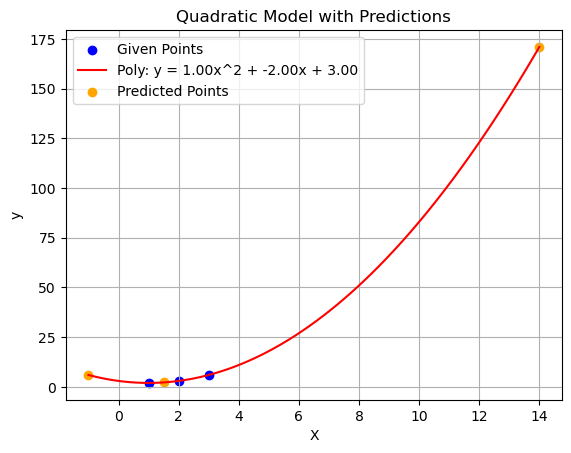

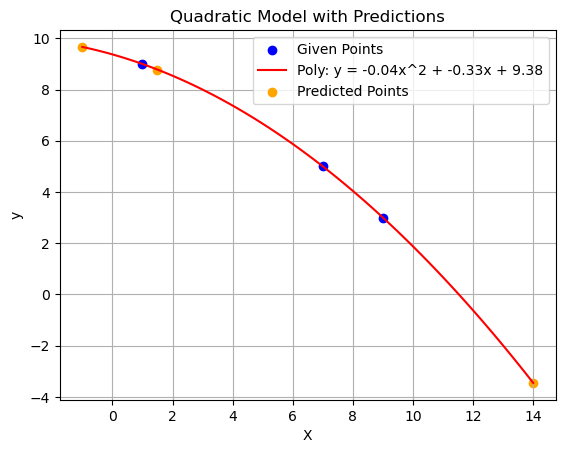

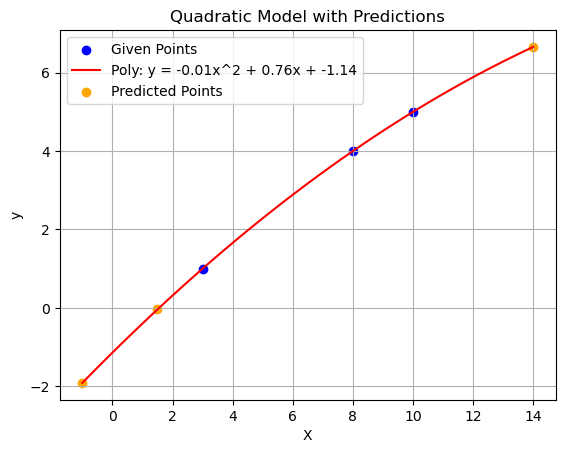

In [97]:
# New array of inputs for prediction, currently containing a single element
new_input = np.array([14, 1.5, -1])

def plot_quadratic_model_with_predictions(X, y, weights, new_input, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted quadratic model
    x_vals = np.linspace(min(X.min(), new_input.min()), max(X.max(), new_input.max()), 100)
    y_vals = weights[0] * x_vals**2 + weights[1] * x_vals + weights[2]
    plt.plot(
    x_vals,
    y_vals,
    color='red',
    label=(
        f'Poly: y = {weights[0]:.2f}x^2 + {weights[1]:.2f}x + '
        f'{weights[2]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_input, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Quadratic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

def predict(x, model):
    return float(model[0])*(float(x)**2) + float(model[1])*float(x) + float(model[2])
# result of 14 in the 3 different models
prediction1model1 = predict(new_input[0], weights1_quadratic)
prediction1model2 = predict(new_input[0], weights2_quadratic)
prediction1model3 = predict(new_input[0], weights3_quadratic)
print(f"model 1 prediction of input 14: {prediction1model1}")
print(f"model 2 prediction of input 14: {prediction1model2}")
print(f"model 3 prediction of input 14: {prediction1model3}")
# result of 1.5 in the 3 different models
prediction2model1 = predict(new_input[1], weights1_quadratic)
prediction2model2 = predict(new_input[1], weights2_quadratic)
prediction2model3 = predict(new_input[1], weights3_quadratic)
print(f"model 1 prediction of input 1.5: {prediction2model1}")
print(f"model 2 prediction of input 1.5: {prediction2model2}")
print(f"model 3 prediction of input 1.5: {prediction2model3}")
# result of -1 in the 3 different models
prediction3model1 = predict(new_input[2], weights1_quadratic)
prediction3model2 = predict(new_input[2], weights2_quadratic)
prediction3model3 = predict(new_input[2], weights3_quadratic)
print(f"model 1 prediction of input -1: {prediction3model1}")
print(f"model 2 prediction of input -1: {prediction3model2}")
print(f"model 3 prediction of input -1: {prediction3model3}")
plot_quadratic_model_with_predictions(X1_quadratic, y1_quadratic, weights1_quadratic, new_input, [prediction1model1, prediction2model1, prediction3model1])
plot_quadratic_model_with_predictions(X2_quadratic, y2_quadratic, weights2_quadratic, new_input, [prediction1model2, prediction2model2, prediction3model2])
plot_quadratic_model_with_predictions(X3_quadratic, y3_quadratic, weights3_quadratic, new_input, [prediction1model3, prediction2model3, prediction3model3])

## 3rd-order Polynomial models
This exercise is about third order polynomials which offer an increased flexibility in modelling data compared to 1. and 2. order polynomials by introducing a cubic term $x^3$.
A 3rd-order polynomial model is given by

$$ y = w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$
In the next tasks you will follow similar steps as 1. and 2. order polynomial. This includes preparing the dataset, constructing the design matrix, calculating the model weights, plotting the results, and using the model to make predictions for new inputs.
Run the cell below to construct a new dataset:


In [72]:
cubic_dataset = np.array([[7, 6], [5, 24], [8, 60], [1, 120]])

<article class="message task"><a class="anchor" id="loading11"></a>
    <div class="message-header">
        <span>Task 7: Third order polynomials</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. For each dataset identify which values correspond to inputs and which are the labels.
2. Create a $4 \times 1$ matrix called `X_cubic`
 that contain the inputs, and a vector called `y_cubic`
 containing the corresponding labels.
3. Create the design matrix, remember to add the cubic and quadratic term.
4. Calculate the inverse of the design matrix.
5. Follow the same procedure as previous to compute the model parameters.



</div></article>



In [83]:
# Write your solution here
X_cubic, y_cubic = separate_inputs_labels(cubic_dataset)
print(X_cubic)
print(y_cubic)

design_cubic = design_matrix(X_cubic)
print(design_cubic)

inverse_cubic = np.linalg.inv(design_cubic)
model_param_cubic = np.dot(inverse_cubic, y_cubic)
print(model_param_cubic)

[[7]
 [5]
 [8]
 [1]]
[  6  24  60 120]
[[343.  49.   7.   1.]
 [125.  25.   5.   1.]
 [512.  64.   8.   1.]
 [  1.   1.   1.   1.]]
[  2.64285714 -31.85714286  85.21428571  64.        ]


<article class="message task"><a class="anchor" id="loading13"></a>
    <div class="message-header">
        <span>Task 8: Plotting</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


1. Use the `plot_cubic_model`
 function to plot the results.
2. Visually inspect the plots and discuss how the model parameters influence the shape and position of the fitted curve.
3. Compare the current results of the 3rd order polynomial to the previous 1st and 2nd order models. Based on the plots, which model shows the best fit?



</div></article>



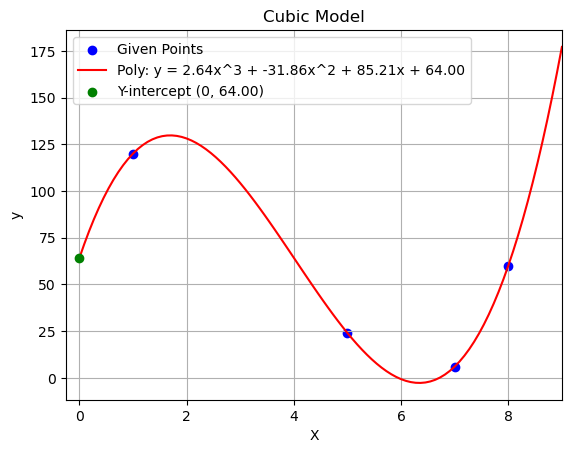

In [85]:
# Function to plot data points and fitted cubic model
def plot_cubic_model(X, y, weights):
    # Plot the data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Extend x_vals range to include zero for correct visualization
    x_vals = np.linspace(0, max(X) + 1, 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]

    # Plot the fitted polynomial
    plt.plot(
    x_vals,
    y_vals,
    color='red',
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))

    # Plot the y-intercept
    plt.scatter(0, weights[3], color='green', zorder=5, label=f'Y-intercept (0, {weights[3]:.2f})')

    # Add title and labels
    plt.title('Cubic Model')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.xlim([-0.25, max(X) + 1])  # Ensure the x-axis starts from 0
    plt.show()

plot_cubic_model(X_cubic, y_cubic, model_param_cubic)

<article class="message task"><a class="anchor" id="loading100"></a>
    <div class="message-header">
        <span>Task 9: Making predictions</span>
        <span class="has-text-right">
          <i class="bi bi-code"></i><i class="bi bi-lightbulb-fill"></i><i class="bi bi-stoplights easy"></i>
        </span>
    </div>
<div class="message-body">


In this task, the learned 3rd order polynomial model is used to predict new labels for the `new_inputs`
 array defined below.
1. Use the previously obtained cubic model parameters to predict labels for the new inputs. 
2. Plot the results using the `plot_cubic_model_with_predictions`
 function.
3. Compare the predictions of the cubic model with the predicitons of the quadratic models.
4. Which model is preffered in terms of representing the relationship between inputs and outputs and why?



</div></article>



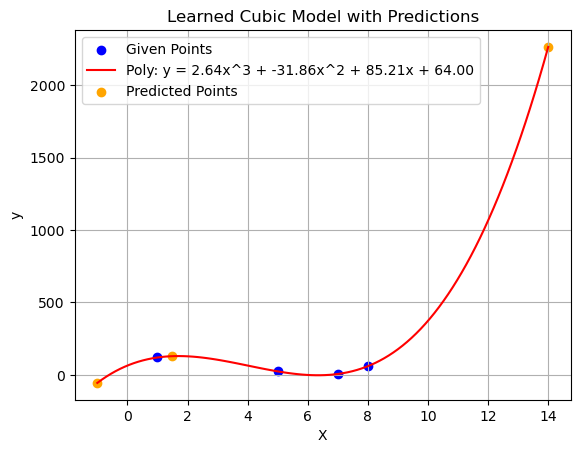

In [94]:
new_inputs = np.array([14, 1.5, -1])

# Function to plot data points, fitted cubic model, and predictions
def plot_cubic_model_with_predictions(X, y, weights, new_inputs, predicted_labels):
    # Plot the original data points
    plt.scatter(X, y, color='blue', label='Given Points')

    # Plot the fitted cubic model
    x_vals = np.linspace(min(min(X), min(new_inputs)), max(max(X), max(new_inputs)), 100)
    y_vals = weights[0] * x_vals**3 + weights[1] * x_vals**2 + weights[2] * x_vals + weights[3]
    plt.plot(
    x_vals,
    y_vals,
    color='red',
    label=(
        f'Poly: y = {weights[0]:.2f}x^3 + {weights[1]:.2f}x^2 + '
        f'{weights[2]:.2f}x + {weights[3]:.2f}'
    ))

    # Plot the new inputs and their predicted labels
    plt.scatter(new_inputs, predicted_labels, color='orange', label='Predicted Points')

    # Add title, labels, and legend
    plt.title('Learned Cubic Model with Predictions')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

def predict_cubic(x, model):
    return float(model[0])*(float(x)**3) + float(model[1])*(float(x)**2) + float(model[2])*float(x) + float(model[3])

y = [predict_cubic(new_inputs[0], model_param_cubic),predict_cubic(new_inputs[1], model_param_cubic), predict_cubic(new_inputs[2], model_param_cubic)]

plot_cubic_model_with_predictions(X_cubic, y_cubic, model_param_cubic, new_inputs, y)

In [0]:
#Write your reflection here...